
# Advisory mission for the Boston municipal authorities


![title](assets/boston_logo.png)

Welcome to the Decision Science exercise of your data certification exam!

Here are a few words to describe how the `decision_science` directory is organised:

In [1]:
# Start by running this cell to see the architecture of the directory
!tree

.
├── README.md
├── __pycache__
│   └── data.cpython-38.pyc
├── boston_crimes.ipynb
├── boston_crimes.sqlite
├── data
│   ├── boston_crimes.sqlite
│   ├── districts.csv
│   └── incident_reports.csv
├── data.py
├── db
│   ├── boston_crimes.html
│   ├── boston_crimes.sqlite
│   └── boston_crimes.xml
└── tests
    ├── answers_inference.json
    ├── linear_regression_analysis.pickle
    ├── linear_regression_model.pickle
    ├── manipulation.pickle
    └── sql.pickle

4 directories, 16 files


- the `boston_crimes.ipynb` notebook that you currently have under your eyes is the main document. You will find all the instructions here and except when it is explicitly specified, you should provide all your answers in this notebook;


- the `data` and `db` folders will be filled-in throughout the exercise respectively with `.csv` datasets and a `.sqlite` file, for you to run all your analyses; 


- you will not have to interact with the `assets` folder for this exercise;


- the `tests` folder will contain all the `.pickle` files that will be saved throughout the exercise with your key findings. Please run all the "Save your results" cells when completing the exercise!

⚠️ **Important remark** before you dive into the exercise. This notebook is quite long and it is easy to get lost in it: take full advantage of the collapsible headers and of the table of content. If you have not yet activated these Jupyter Notebook extensions, you may consider doing so now!

# Imports

You can use this section to run your imports in a centralised manner throughout the exercise.

In [2]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

In [3]:
# Useful import for data collection
import sqlite3

In [4]:
# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

In [5]:
# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Useful imports to estimate regression models
import statsmodels.formula.api as smf

# 1. Analysis for the mayor's team

During the last municipal campaign in Boston, criminality has been a major topic of debates. As citizens have expressed strong expectations from her on that front, the newly-elected mayor of Boston is looking for data-based insights on criminality in the Massachussetts capital. She has mandated your economics and urbanism consulting firm, *The Locomotive*, for this study.

## 1.1 Load the database

Download the `boston_crimes.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes.sqlite) and store it inside the `db` folder.

In [7]:
# You may directly run this cell to do so
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes.sqlite > db/boston_crimes.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  1038k      0  0:00:18  0:00:18 --:--:-- 1106k


## 1.2 Familiarize yourself with the database

This section aims at giving you a first overview of the database. 

As you will see, it consists in three tables: 

- the `incident_reports` table has been provided by the Police Department of Boston. Each observation corresponds to a criminal incident that has required an intervention by the police in the municipality of Boston;  



- the `districts` table has been provided by the Urbanism Department of Boston. It gathers geographical information about the various police districts of Boston;  



- and the `indicators` table has been shared by the Economics Department of Boston, which keeps track of various indicators of the social and economic activity of Boston neighborhoods. Each observation corresponds to a police district.

More information about the different fields of these three tables can be found in the dedicated `README.md` file

### Connect to the database

**🔍 Using your preferred SQL client, connect to the database and browse through it as you wish to get acquainted with the data.**

### Draw a schema of the database

**📝 Draw the database schema thanks to the [schema editor](https://kitt.lewagon.com/db) on Kitt.**

**📝 Download the schema and save it as `boston_crimes.xml` in the `db` folder.**

## 1.3 Extract the relevant dataset

Now that you have a good overview of the database, you can kick off the work! You will start with an SQL query to gather the relevant information.

### Build the dataset

We want to investigate the influence of the socio-economic characteristics of Boston's different districts on the number of crime reports and incidents. To do so, we need to extract the relevant dataset. **Each row should correspond to one of the 12 police districts of Boston** (as listed in the `districts` table of the database).

To identify the district, we will need **the following columns**: 

- the `CODE` of the police district (1 letter and 1 or 2 numbers);
- the full `NAME` of the police district.

Additionally, you will need to **create an additional field** (which will serve as dependent variable in future regressions): `NB_INCIDENTS`, i.e. the total number of incidents reported in the police district over the period covered by the data at hand (2015-2019).

Eventually, we want the dataset to **include several socio-economic indicators**:

- `MEDIAN_AGE`;
- `TOTAL_POP`;
- `PERC_OF_30_34`;
- `PERC_MARRIED_COUPLE_FAMILY`;
- `PER_CAPITA_INCOME`;
- `PERC_OTHER_STATE_OR_ABROAD`;
- `PERC_LESS_THAN_HIGH_SCHOOL`;
- `PERC_COLLEGE_GRADUATES`. 

Overall, your dataset should comprise 12 rows and 11 columns.

Eventually, note that **the resulting DataFrame must be ordered by the number of incidents**, from the largest to the smallest total.

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [8]:
query = """
WITH incident_per_district AS (
	SELECT 
		DISTRICT , 
		count(INCIDENT_NUMBER) as NB_INCIDENTS
	FROM incident_reports
	GROUP BY DISTRICT )
SELECT d.CODE, 
	d.NAME, 
	incident_per_district.NB_INCIDENTS,
	indicators.MEDIAN_AGE,
	indicators.PER_CAPITA_INCOME,
	indicators.PERC_COLLEGE_GRADUATES,
	indicators.PERC_LESS_THAN_HIGH_SCHOOL,
	indicators.PERC_MARRIED_COUPLE_FAMILY,
	indicators.PERC_OF_30_34,
	indicators.PERC_OTHER_STATE_OR_ABROAD,
	indicators.TOTAL_POP
FROM districts d
LEFT JOIN incident_per_district ON d.CODE = incident_per_district.DISTRICT 
LEFT JOIN indicators  ON d.CODE  = indicators.CODE
ORDER BY NB_INCIDENTS DESC
"""

**📝 Store the output of the query in a `DataFrame` named `crimes_df`. Display the 5 first rows, as well as the shape of the dataset.**

In [9]:
# YOUR CODE HERE

conn = sqlite3.connect('db/boston_crimes.sqlite')
c = conn.cursor()

crimes_df = pd.read_sql_query(query, conn)#.set_index('id')
crimes_df.head()

,CODE,NAME,NB_INCIDENTS,MEDIAN_AGE,PER_CAPITA_INCOME,PERC_COLLEGE_GRADUATES,PERC_LESS_THAN_HIGH_SCHOOL,PERC_MARRIED_COUPLE_FAMILY,PERC_OF_30_34,PERC_OTHER_STATE_OR_ABROAD,TOTAL_POP
0,B2,Roxbury,38877,32.5,20978,18.9,23.0,17.8,27.8,2.9,54161
1,C11,Dorchester,32875,33.4,29767,17.1,18.0,26.6,28.2,2.4,126909
2,D4,South End,31258,37.1,83609,8.5,11.8,28.3,33.9,6.2,32571
3,B3,Mattapan,28331,36.7,28356,22.9,14.5,29.8,20.9,2.3,26659
4,A1,Downtown,26260,33.5,80057,6.9,15.4,35.8,32.5,14.8,18306


In [10]:
crimes_df.shape

(12, 11)

### Save your results

You can run the following cell to save your results:

In [11]:
ChallengeResult('sql', query=query, data=crimes_df).write()

## 1.4 Linear regression - The socio-economic determinants of criminality

As mentioned above, we want to investigate the impact of the socio-economic characteristics of the different Boston police districts on the number of incidents that are reported in these areas. 
- We are going to use the number of incidents as dependent variable 
- our regressors will be the various socio-economic indicators extracted from the database.

### 1.4.1 Start from a fresh dataset

To make sure that you are using the right data, you can load a fresh dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/regression.csv).

**📝 Load the data into a DataFrame named `data`**

In [12]:
# YOUR CODE HERE
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes_regression.csv")

In [13]:
data.head()

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston


### 1.4.2 Run the regression and output its summary

Thanks to the Statsmodels Formula API, we will run the regression described below. 

The dependent variable (or target variable) should be **the total number of incidents** reported in each police district.

We will focus on the following regressors: 

- the **median age** in the district, whose effect is difficult to anticipate on the number of crimes;
 
 
- the **percentage of 30-34 years old** in the district, whose effect is also unclear a priori;
 
 
- the **share of families with a married couple** among all households, which could be anticipated to have a negative effect on criminality (more attention to safety among residents...);
 
 
- the **percentage of residents having moved from abroad or from another US state over the last year**, mobility being often associated with social marginalisation and possibly with a higher risk of resorting to illegal activities;
 
 
- the **percentage of residents having stopped their studies before getting a high school degree**. Economic models would suggest that due to the more narrow job opportunities to which this group has access, the incentive is stronger to resort to illicit activities;
 
 
- the **percentage of college graduates** in the district, which we would expect to have an opposite effect.
 
**📝 Based on these indications, estimate the linear regression model and output its summary in this section of the notebook. Store the estimated model inside a `model` variable.**

In [14]:
# YOUR CODE HERE

import statsmodels.formula.api as smf

# instanciate a model
model = smf.ols(formula='NB_INCIDENTS ~ MEDIAN_AGE + PERC_OF_30_34 \
                + PERC_MARRIED_COUPLE_FAMILY + PERC_OTHER_STATE_OR_ABROAD \
                + PERC_LESS_THAN_HIGH_SCHOOL + PERC_COLLEGE_GRADUATES \
                ', data=data)

# train the model to find best line
model = model.fit()
model

In [15]:
model.summary()

/Users/catherinechen/.pyenv/versions/3.8.6/envs/data/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NB_INCIDENTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     7.391
Date:                Tue, 29 Jun 2021   Prob (F-statistic):             0.0222
Time:                        15:58:51   Log-Likelihood:                -114.59
No. Observations:                  12   AIC:                             243.2
Df Residuals:                       5   BIC:                             246.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.358e+04   6.16e+04      0.220      0.834   -1.45e+05    1.72e+05
MEDIAN_AGE                  2252.7344   1237.522      1.820      0.128    -928.416    5433.885
PERC_OF_30_34               -532.9973    468.940     -1.137      0.307   -1738.447     672.452
PERC_MARRIED_COUPLE_FAMILY -2115.1839    408.344     -5.180      0.004   -3164.866   -1065.502
PERC_OTHER_STATE_OR_ABROAD  1787.6939    532.432      3.358      0.020     419.034    3156.354
PERC_LESS_THAN_HIGH_SCHOOL   112.7375    493.977      0.228      0.829   -1157.072    1382.547
PERC_COLLEGE_GRADUATES        19.4699    458.775      0.042      0.968   -1159.850    1198.790
==============================================================================
Omnibus:                        6.933   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                3.155
Skew:                           1.148   Prob(JB):                        0.206
Kurtosis:                       4.020   Cond. No.                     2.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Save your results

You can run the following cell to save your results:

In [16]:
ChallengeResult(
    'linear_regression_model',
    data=data,
    model=model
).write()

### 1.4.3 Statistical inference questions 🤯

You will now be asked a series of statistical inference and methodological questions about the regression model estimated above. Don't worry if results do not perfectly fit the "predictions" that we made earlier about the impact of each regressor: the goal was to form an *a priori* hypothesis, which is validated or invalidated through this empirical analysis.

In [17]:
results_summary = model.summary()
results_as_html = results_summary.tables[1].as_html()
res = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [18]:
res

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13580.0000,61600.000,0.220,0.834,-145000.000,172000.000
MEDIAN_AGE,2252.7344,1237.522,1.820,0.128,-928.416,5433.885
PERC_OF_30_34,-532.9973,468.940,-1.137,0.307,-1738.447,672.452
PERC_MARRIED_COUPLE_FAMILY,-2115.1839,408.344,-5.180,0.004,-3164.866,-1065.502
PERC_OTHER_STATE_OR_ABROAD,1787.6939,532.432,3.358,0.020,419.034,3156.354
PERC_LESS_THAN_HIGH_SCHOOL,112.7375,493.977,0.228,0.829,-1157.072,1382.547
PERC_COLLEGE_GRADUATES,19.4699,458.775,0.042,0.968,-1159.850,1198.790


#### Questions on the results

**❓ Is the median age associated with a positive (increasing the number of crimes) or a negative (decreasing the target variable) effect on the number of crime incidents? Simply write your answer as a string below**

In [19]:
answer_median_age = '''
positive effect : increasing the number of crimes 
'''

**❓ What is the t-statistic associated with the median age regressor? How is it computed?**

💡 Hint: We are looking at a ratio

In [20]:
answer_t_statistic = '''
the t-statistic associated is 1.820

formula = (coef - (P>|t|)) / std err

'''

**📝 Recompute approximately the t-statistic based on the regression summary.**

As it is a ratio $t = \frac{numerator}{denominator}$:
- Store the numerator into a `numerator` variable
- Store the denominator into a `denominator` variable
- Store the t-statistic into a `t_median_age` variable

In [21]:
# elements needed for the t-stat computation

coef = res.loc["MEDIAN_AGE"]["coef"]
print("coef is:", coef)

p_value = res.loc["MEDIAN_AGE"]["P>|t|"]
print("p_value is:", p_value)

std_error = res.loc["MEDIAN_AGE"]["std err"]
print("std_error is:", std_error)

coef is: 2252.7344
p_value is: 0.128
std_error is: 1237.522


In [22]:
# YOUR CODE HERE

numerator = coef - p_value

denominator = std_error

t_median_age = numerator / denominator

In [23]:
t_median_age

1.820255639899735

**❓ What is the p-value associated with the median age regressor? Store it in the `pvalue_median_age` variable (you may directly copy-paste it from the regression summary).** 

In [24]:
# YOUR CODE HERE
pvalue_median_age = 0.128

pvalue_median_age = res.loc["MEDIAN_AGE"]["P>|t|"]
pvalue_median_age

0.128

**❓ What does this p-value mean for the median age? Is its effect statistically significant at the 95% confidence level? At the 90% confidence level? Simply formulate your answer in the cell below.**

In [25]:
# to doooo -> rerun a model with alpha = 10%

answer_p_value = """
Hypothesis_0 = "the median age does not impact on the number of crimes"

p-value of 0.128 is :
- superior to alpha which is 5% in case of a 96% confidence level 
=> we fail to reject the hypothesis 0 

# to doooo -> rerun a model with alpha = 10%
- superior to alpha which is 10% in case of a 90% confidence level
=> we fail to reject the hypothesis 0 
"""

**❓ What are the two regressors whose effect is statistically significant at the 95% confidence level in this regression model? Store the name of the variables as a list of strings in the `significant_regressors` variable.**

In [26]:
# YOUR CODE HERE
significant_regressors = ["PERC_MARRIED_COUPLE_FAMILY", "PERC_OTHER_STATE_OR_ABROAD"]

**❓ Holding all other regressors constant, by how much does the total number of incidents increase or decrease when the share of families with a married couple increases by 1 percentage point in the district? Please formulate a full sentence with statistical rigor!**

In [27]:
res.loc["PERC_MARRIED_COUPLE_FAMILY"]["coef"]

-2115.1839

In [28]:
answer_how_much_increase = """
Holding all other regressors constant, when the share of families with a married couple increases by 1 percentage point in the district, 
the total number of incidents decreases by 2115.
"""

#### Limits of this regression model

You had asked the intern on the team to estimate a linear regression model so as to investigate the socio-economic determinants of crime in Boston. The results above are those that he presented. In the email he sent to you, he added:

> *You will probably notice the extremely high R-squared score of this model: I think we have an excellent fit and the results are solid* 😄

But you have very strong doubts about this regression and you think it is a perfect occasion to give some very important advice to your intern...

**❓  What is the main limitation of this (clearly spurious) regression according to you? This observation explains why we are getting a very high R-squared and large standard errors. Please provide your answer in the following Markdown cell.**

In [29]:
answer_limitations = """
As the dataset is super duper small, we can't generalize that way...
-> F-statistic is pretty low 
-> Cond. No. of 2.42e+03 is pretty high =>  strong multicolinearity
"""

### Save your results

You can run the following cell to save your results:

In [30]:
import json
answers_inference = {"MEDIAN_AGE": answer_median_age,
                    "T_STAT":answer_t_statistic,
                     "P_VALUE": answer_p_value,
                     "INCREASE": answer_how_much_increase,
                     "LIMITATIONS": answer_limitations}

with open("tests/answers_inference.json", "w", encoding="utf-8") as f:
    json.dump(answers_inference, f, ensure_ascii=False, indent=4)

ChallengeResult(
    'linear_regression_analysis',
    model=model,
    numerator=numerator,
    denominator=denominator,
    t=t_median_age,
    pvalue=pvalue_median_age,
    regressors=significant_regressors
).write()

# 2. Analysis for the police department

The head of the Police Department of Boston, who read your report for the Mayor's team, was extremely interested in the results. He contacted your consulting firm for an additional presentation, that would focus on the nature of crimes that take place in Boston, the potential time trends that you could identify and/or the heterogeneity of the impact of criminality on the different police districts. 

## 2.1 Start with a fresh dataset

You will start from a fresh dataset, that corresponds more or less to the `incident_reports` table of the database.

In [31]:
# Run this cell to download the datasets in the data directory
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/incident_reports.csv > data/incident_reports.csv   
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/districts.csv > data/districts.csv    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0   688k      0  0:00:28  0:00:28 --:--:--  906k0M    0     0   652k      0  0:00:30  0:00:25  0:00:05  625k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   498  100   498    0     0   1549      0 --:--:-- --:--:-- --:--:--  1551


In [32]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


## 2.1 Further data manipulations

In this section, we are going to answer two specific questions that the head of the Police Department of Boston asked your team, about the characteristics of the incidents that occur in the various districts of the municipality.

### 2.1.1 Most represented type of incident per district

First, the head of the Police Department of Boston wants to know what incident category is most often found in each district. 

**📝 Construct a DataFrame with**
- **one row per police district, designated by its full name**
- **one text column that indicates the name of the most common category of incident in the district over the whole sample period.**

💡 Hint: you may need to first define a custom aggregation function.

In [33]:
# YOUR CODE HERE

data.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE_GROUP     0
SHOOTING               0
OCCURRED_ON_DATE       0
LAT                    0
LONG                   0
NAME                   0
LAT_POLICE_STATION     0
LONG_POLICE_STATION    0
dtype: int64

In [34]:
top_incident = lambda x: x.value_counts().index[0]
data[["OFFENSE_CODE_GROUP","NAME"]].groupby("NAME").agg(top_incident)

,OFFENSE_CODE_GROUP
NAME,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


**❓ Can you tell what is the second most common offense int the Brighton district?**

In [35]:
top_incident = lambda x: x.value_counts().index[1]
data[["OFFENSE_CODE_GROUP","NAME"]].groupby("NAME").agg(top_incident)

,OFFENSE_CODE_GROUP
NAME,
Brighton,Police investigation procedure
Charlestown,Police investigation procedure
Dorchester,Police investigation procedure
Downtown,Police investigation procedure
East Boston,Police investigation procedure
Hyde Park,Police investigation procedure
Jamaica Plain,Police investigation procedure
Mattapan,Larceny and vandalism
Roxbury,Police investigation procedure


In [36]:
second_most_common_offence = "Police investigation procedure"

### Average distance to the police station per district

Second, based on the Haversine distance function defined below, the head of the Police Department would like to know, for each district, **the average distance between the location of the incident and the police station**. 

**📝 Construct a DataFrame with one row per police district, designated by its full name, and one column that displays this average Haversine distance.**

In [37]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [38]:
#for checking purpose
row = 1

lon1 = data.LONG[row]
lat1 = data.LAT[row]
lon2 = data.LONG_POLICE_STATION[row]
lat2 = data.LAT_POLICE_STATION[row]

haversine_distance(lon1, lat1, lon2, lat2)

2.1459194712324337

In [39]:
# YOUR CODE HERE

#create a new column containing the distance for each incident
data["Haversine_Distance"] = data.apply(lambda row: haversine_distance(row["LONG"], row["LAT"], row["LONG_POLICE_STATION"], row["LAT_POLICE_STATION"]) , axis = 1)

In [40]:
# YOUR CODE HERE
# mean of distance per district

mean_distance_df = data[["Haversine_Distance","NAME"]].groupby("NAME").mean()
mean_distance_df

,Haversine_Distance
NAME,
Brighton,3.770867
Charlestown,58.758394
Dorchester,3.174444
Downtown,6.336657
East Boston,5.568626
Hyde Park,2.397613
Jamaica Plain,2.585737
Mattapan,1.908636
Roxbury,2.989029


In [41]:
#check 
data[data.NAME == "Brighton"]["Haversine_Distance"].mean()

3.7708668698178265

**❓ Can you tell what is the average distance between the police station and the offenses in the Brighton district?**

In [42]:
# YOUR CODE HERE
average_distance_km = mean_distance_df.loc["Brighton"][0]
average_distance_km

3.7708668698178434

In [43]:
result = ChallengeResult('manipulation',
                         second_most_common_offence=second_most_common_offence,
                         average_distance_km=average_distance_km)
result.write()

# 3. Short presentation (REQUIRED TO VALIDATE THE CERTIFICATION)
🚨🚨🚨🚨🚨🚨

Using the latest dataset that you loaded, your mission is now to prepare 5 slides (including a title slide) that you would present to the head of the Police Department. You may or may not, as you prefer, include the output of the two "Further data manipulations" tasks in your presentation.

⚠️  You can use any presentation editor of your choice, but **the slides must be shared either in HTML or in PDF format and saved in the current directory**

Before you get started, here are four small pieces of advice:

- to prepare your data visualisations, do not hesitate to create a separate, blank notebook; 


- pay particular attention to the readability and the clarity of your legends, titles, charts and tables; 


- the Pandas `resample` method might be useful if you want to plot time trends;


- keep in mind that you are working with real data and sometimes, data are not very talkative. Do not feel discouraged if your charts do not provide revolutionary insights: typically, an absence of trend is a substantial piece of information!

Good luck in changing Boston residents' lives!

In [44]:
data.OFFENSE_CODE_GROUP.value_counts()

Larceny and vandalism             76038
Police investigation procedure    50520
Violence and harassment           30020
Fraud and law violations          26801
Other                             19399
Drugs and disorderly conduct      19022
Disputes                          15421
Name: OFFENSE_CODE_GROUP, dtype: int64

BOSTON we hear you, The Locomotive is here to save you ! \

We all need masks AND safety these days

In [46]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,Haversine_Distance
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


## General Analysis 

In [47]:
# import pandas_profiling
# data.profile_report()

In [48]:
#presence of duplicated rows... that we're going to remove
"Please make sure your recording procedure doesn't record an incident twice"

print("number of incidents initially:", data.shape[0])
duplicate_count = len(data)-len(data.drop_duplicates()) 

print("there are", duplicate_count,"duplicates")

data.drop_duplicates(inplace = True)
print("number of incidents after removing duplicates:", data.shape[0])


number of incidents initially: 237221
there are 11337 duplicates
number of incidents after removing duplicates: 225884


In [49]:
incident_count = lambda x: x.count()
split_df = data[["OFFENSE_CODE_GROUP","NAME"]].groupby("NAME").agg(incident_count).sort_values(by ="OFFENSE_CODE_GROUP", ascending = False  )

total = data.shape[0]
portion = lambda x: x/total

split_df["part"] = split_df["OFFENSE_CODE_GROUP"].apply(portion)
split_df

,OFFENSE_CODE_GROUP,part
NAME,,
Roxbury,36846,0.163119
Dorchester,31153,0.137916
South End,29589,0.130992
Mattapan,27242,0.120602
Downtown,24781,0.109707
South Boston,15918,0.070470
Brighton,13268,0.058738
Jamaica Plain,12171,0.053882
Hyde Park,12056,0.053373


In [50]:
# Analysis of the nature 
from sklearn.preprocessing import OneHotEncoder

y_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder
y_ohe.fit(data[['OFFENSE_CODE_GROUP']]) # Fit one hot encoder
# pd.DataFrame(y_ohe.transform(data[["OFFENSE_CODE_GROUP"]]), columns = list(y_ohe.categories_[0]))

data["Disputes"], data["Drugs and disorderly conduct"], data["Fraud and law violations"],\
data["Larceny and vandalism"], data["Other"], data["Police investigation procedure"],\
data["Violence and harassment"] = y_ohe.transform(data[["OFFENSE_CODE_GROUP"]]).T

In [113]:
nature_list = list(y_ohe.categories_[0])

In [52]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,Haversine_Distance,Disputes,Drugs and disorderly conduct,Fraud and law violations,Larceny and vandalism,Other,Police investigation procedure,Violence and harassment
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,I172075854,Fraud and law violations,0,2015-09-02 09:00:00,42.314013,-71.086353,Roxbury,42.328894,-71.085359,1.656718,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [79]:
nature_df = pd.DataFrame(data.OFFENSE_CODE_GROUP.value_counts())

total = data.shape[0]
portion = lambda x: x/total

nature_df["part"] = nature_df["OFFENSE_CODE_GROUP"].apply(portion)
nature_df

,OFFENSE_CODE_GROUP,part
Larceny and vandalism,72967,0.323029
Police investigation procedure,49564,0.219422
Violence and harassment,28446,0.125932
Fraud and law violations,25512,0.112943
Other,18831,0.083366
Disputes,15405,0.068199
Drugs and disorderly conduct,15159,0.067110


## Global analysis

In [86]:
get_year = lambda x: int(x[:4])
data["year"] = data["OCCURRED_ON_DATE"].apply(get_year)

<BarContainer object of 4 artists>

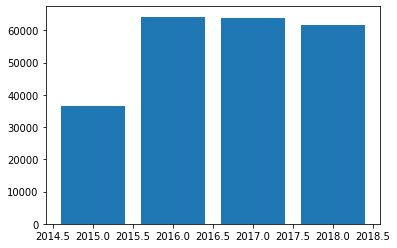

In [96]:
tmp = pd.DataFrame(data.year.value_counts())

Over the 4 past years (2015-2019):
- a significant increase between 2015 and 2016 (+76%) -> why ? 
- two main incident reasons are "Larceny and vandalism" and "Police investigation procedure" (54% of incidents)
- 55% of the incidents occured in 5 districts (out of 12)


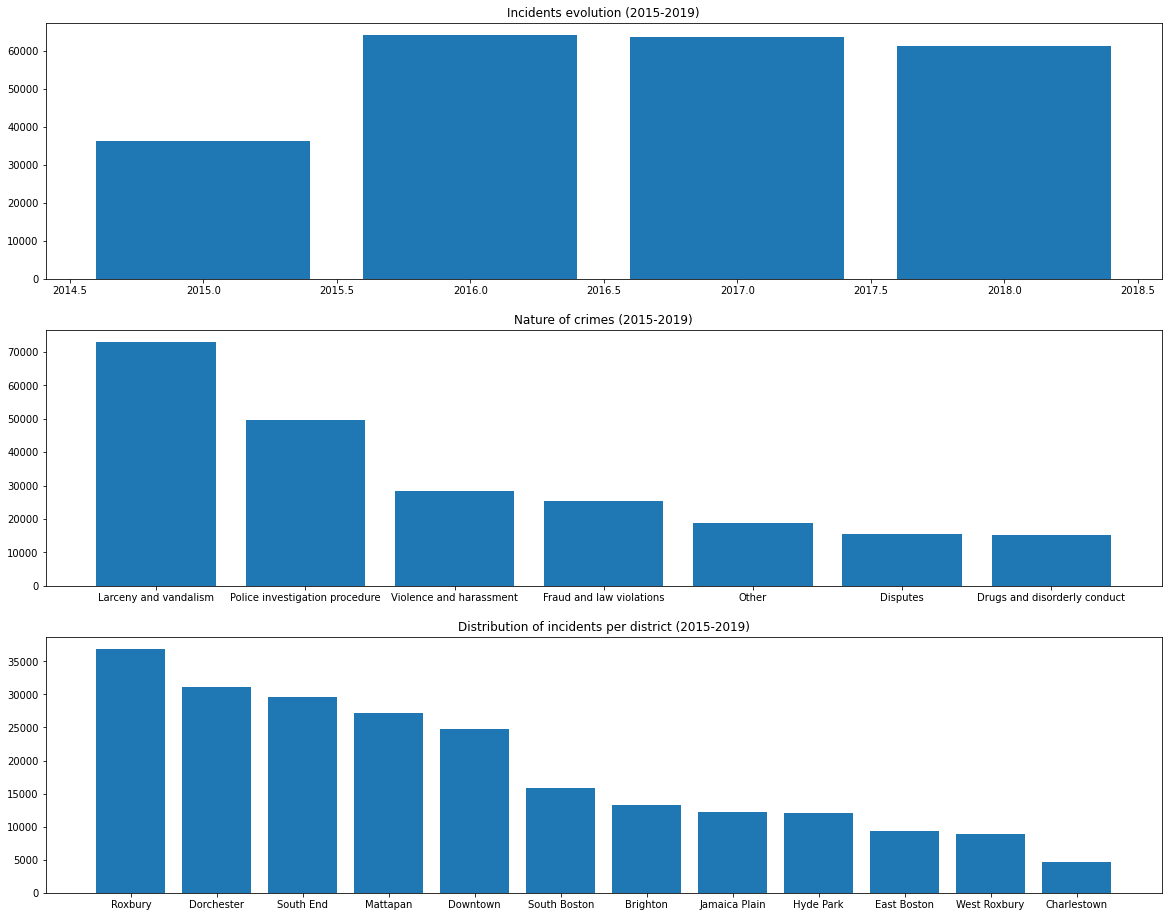

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 16))

ax1.bar(tmp.index, tmp.year)
ax1.set_title("Incidents evolution (2015-2019)")

ax2.bar(nature_df.index, nature_df.OFFENSE_CODE_GROUP )
ax2.set_title("Nature of crimes (2015-2019)")

ax3.bar(split_df.index, split_df.OFFENSE_CODE_GROUP)
ax3.set_title("Distribution of incidents per district (2015-2019)");

## Evolution of incidents between 2015 - 2019

Why such a jump between 2015 and 2019

In [115]:
evol_list = nature_list.append("year") 
nature_list

['Disputes',
 'Drugs and disorderly conduct',
 'Fraud and law violations',
 'Larceny and vandalism',
 'Other',
 'Police investigation procedure',
 'Violence and harassment',
 'year']

In [122]:
evol_nature_df = data[['Disputes',
 'Drugs and disorderly conduct',
 'Fraud and law violations',
 'Larceny and vandalism',
 'Other',
 'Police investigation procedure',
 'Violence and harassment',
 'year']].groupby(data.year).sum().drop(columns="year")
evol_nature_df

,Disputes,Drugs and disorderly conduct,Fraud and law violations,Larceny and vandalism,Other,Police investigation procedure,Violence and harassment
year,,,,,,,
2015,1672.0,3000.0,4549.0,13121.0,3243.0,6694.0,4148.0
2016,4340.0,4410.0,7298.0,21022.0,5193.0,14051.0,7893.0
2017,4667.0,3853.0,6773.0,19902.0,5062.0,15420.0,8090.0
2018,4726.0,3896.0,6892.0,18922.0,5333.0,13399.0,8315.0


Text(0.5, 0.98, 'Evolution of incidents per nature (2015-2019)')

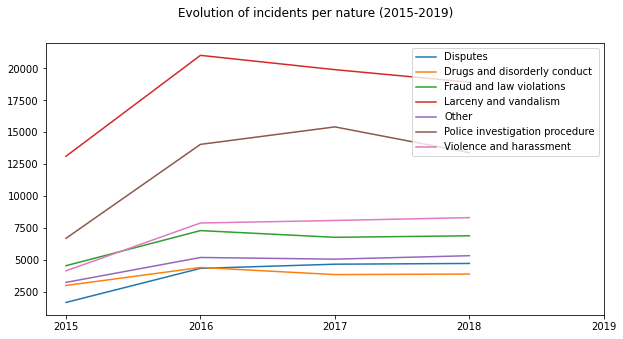

In [138]:
plt.figure(figsize = (10,5))
plt.plot(evol_nature_df.index, evol_nature_df["Disputes"], label = "Disputes")
plt.plot(evol_nature_df.index, evol_nature_df["Drugs and disorderly conduct"], label = "Drugs and disorderly conduct")
plt.plot(evol_nature_df.index, evol_nature_df['Fraud and law violations'], label = 'Fraud and law violations')
plt.plot(evol_nature_df.index, evol_nature_df['Larceny and vandalism'], label = 'Larceny and vandalism')
plt.plot(evol_nature_df.index, evol_nature_df['Other'], label = "Other")
plt.plot(evol_nature_df.index, evol_nature_df['Police investigation procedure'], label = "Police investigation procedure")
plt.plot(evol_nature_df.index, evol_nature_df['Violence and harassment'], label = 'Violence and harassment')
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.legend(loc = "best")
plt.suptitle("Evolution of incidents per nature (2015-2019)")

The high jump is due to "Larceny and vandalism", "Police investigation procedure" which are the two main incident reasons over the period.

## Deeper analysis on "Larceny and vandalism" and "Police investigation procedure"

Evolution of these two incidents in districts

Larceny and vandalism

In [162]:
data.NAME.unique()

array(['Roxbury', 'Dorchester', 'Downtown', 'Hyde Park', 'South End',
       'Mattapan', 'Brighton', 'East Boston', 'West Roxbury',
       'South Boston', 'Jamaica Plain', 'Charlestown'], dtype=object)

In [168]:
new_cols = []

for name in data.NAME.unique():
    new = data[(data["Larceny and vandalism"] == 1) & (data["NAME"] == name)][["Larceny and vandalism", "year"]].groupby(data.year).agg(sum).drop(columns = "year")["Larceny and vandalism"]
    new_cols.append(new)
    
new_cols

[year
 2015    1864.0
 2016    2852.0
 2017    2711.0
 2018    2536.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015    1434.0
 2016    2569.0
 2017    2361.0
 2018    2400.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015    1557.0
 2016    2480.0
 2017    2470.0
 2018    2459.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015     604.0
 2016    1033.0
 2017     928.0
 2018     825.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015    2560.0
 2016    3814.0
 2017    3554.0
 2018    3498.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015    1153.0
 2016    1816.0
 2017    1764.0
 2018    1585.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015     904.0
 2016    1525.0
 2017    1408.0
 2018    1230.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015    536.0
 2016    823.0
 2017    750.0
 2018    727.0
 Name: Larceny and vandalism, dtype: float64,
 year
 2015    504.0
 2016    802.0
 2017    766.0
 2018    671.0
 Name: Lar

In [172]:
type(new_cols[0])

pandas.core.series.Series

In [170]:
pd.DataFrame(data = new_cols, columns = list(data.NAME.unique()))

,Roxbury,Dorchester,Downtown,Hyde Park,South End,Mattapan,Brighton,East Boston,West Roxbury,South Boston,Jamaica Plain,Charlestown
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Larceny and vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## When do these two incidents occur ?

In [188]:
tmp1 = data.copy()

In [190]:
hour_df = data[['OFFENSE_CODE_GROUP','SHOOTING','OCCURRED_ON_DATE','NAME']]
hour_df['Haversine_Distance'] = tmp1['Haversine_Distance']
hour_df.drop_duplicates(inplace = True)
pd.to_datetime(hour_df['OCCURRED_ON_DATE'])
hour_df['OCCURRED_ON_DATE'] = hour_df['OCCURRED_ON_DATE'].apply(pd.to_datetime)
hour_df['week_day'] = hour_df['OCCURRED_ON_DATE'].dt.dayofweek

<ipython-input-190-b4a7a20e2428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df['Haversine_Distance'] = tmp1['Haversine_Distance']
<ipython-input-190-b4a7a20e2428>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df.drop_duplicates(inplace = True)
<ipython-input-190-b4a7a20e2428>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [191]:
def num_to_week(x):
    if x == 0:
        x = 'Monday'
    elif x == 1:
        x = 'Tuesday'
    elif x == 2:
        x = 'Wednesday'
    elif x == 3:
        x = 'Thursday'
    elif x == 4:
        x = 'Friday'
    elif x == 5:
        x = 'Saturday'
    else :
        x = 'Sunday'
    return x
hour_df['week_day'] = hour_df['week_day'].apply(num_to_week)

<ipython-input-191-1f8a57c43a9d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df['week_day'] = hour_df['week_day'].apply(num_to_week)


In [192]:
def get_hour(x):
    x = x.hour
    return x

hour_df['hour'] = hour_df['OCCURRED_ON_DATE'].apply(get_hour)

<ipython-input-192-c3a893a41ab7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df['hour'] = hour_df['OCCURRED_ON_DATE'].apply(get_hour)


In [193]:
hour_df_final = hour_df[['OFFENSE_CODE_GROUP','SHOOTING','week_day','hour']][hour_df["OFFENSE_CODE_GROUP"]\
                .isin(['Police investigation procedure','Larceny and vandalism'])]

These two kind of incidents occur every day but especially on Friday in the afternoon

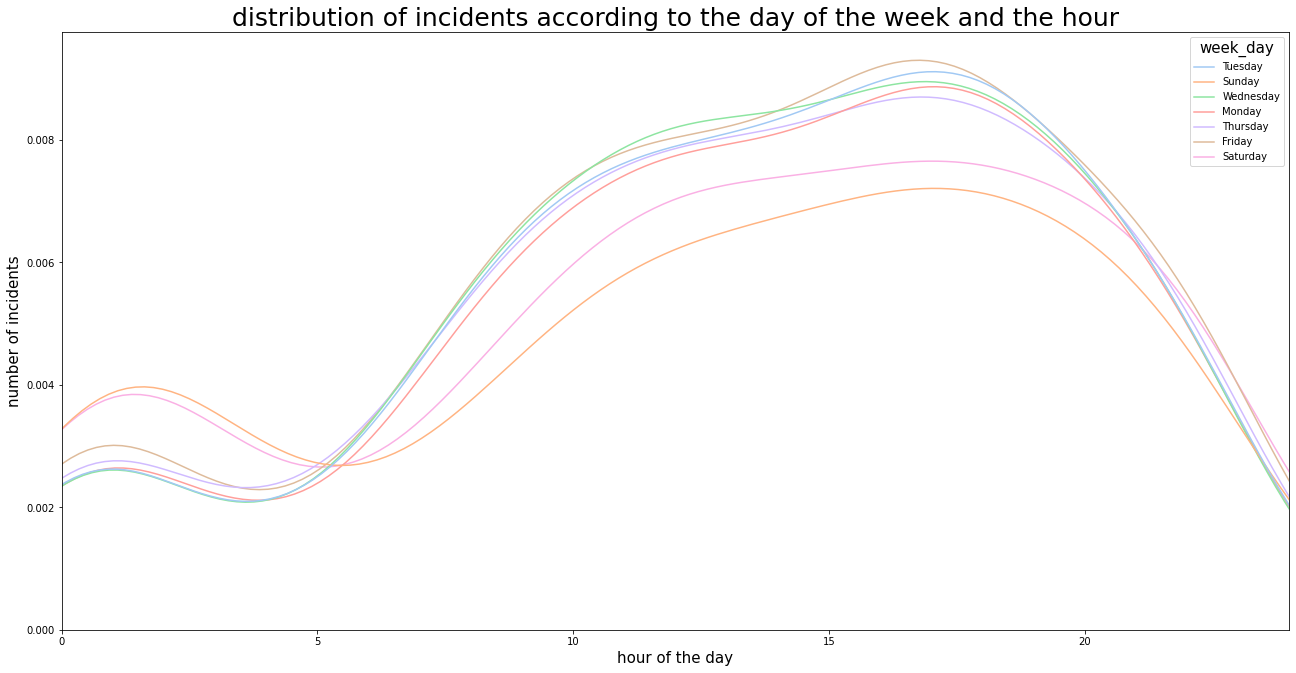

In [201]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 11)
b = sns.kdeplot(data = hour_df_final,x='hour',hue='week_day',multiple='layer',\
            palette='pastel',ax = ax,bw_adjust=2)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='15')
b.set_xlabel("hour of the day",fontsize=15)
b.set_ylabel("number of incidents",fontsize=15)
plt.xlim(0, 24)
plt.title("distribution of incidents according to the day of the week and the hour", fontsize = 25)
plt.show();

# A word of conclusion

Congratulations for going through the exercise 🎉

If you wish to pursue your analysis at some point, note that all datasets (and many others) are publicly available online, on the [Analyze Boston](https://data.boston.gov) website.

Besides, if you are interested in the topic, you can start by reading the work of Nobel Prize laureate Gary Becker, who was the first to model crime as a rational phenomenon, similarly to an economic decision. This model, although it has limitations, marked a breakthrough in the study of crime and paved the way for many empirical studies that further analysed the socio-economic determinants of illegal activities. 

👉 [Link](https://olis.leg.state.or.us/liz/2017R1/Downloads/CommitteeMeetingDocument/125036) to download a full-text version of "Crime and Punishment: An Economic Approach" by Becker (1968)